# 01 Differential Geometry for Engineers

## B) Lie groups

$\color{#003660}{\text{Nina Miolane - Assistant Professor}}$ @ BioShape Lab @ UCSB ECE
- Texts and illustrations by [Adele Myers](https://ahma2017.wixsite.com/adelemyers) @ BioShape Lab.
- Textbook: Ch. 1 - 4.

<center><img src="figs/01_manifold_definition2.png" width=400px alt="default"/></center>


### Outline

- **Unit 1 (Geometry - Math!)**: Differential Geometry for Engineers
  - A) Manifolds
    - Our data spaces.
    - Example: a space of shapes.
  - **B) Lie groups**
    - Group of transformations that act on our data.
    - Example: the group of rotations.
  - C) Riemannian Metrics
    - Tools we use to compute on these spaces.
    - Example: helps computing a distance between two shapes.

### B) Lie groups: Outline

You will learn:

1. **What is a (Lie) group?**
2. Why do we care about Lie groups?
3. How can we implement Lie groups?

# 1. What is a Lie group?

Lie groups are abstract mathematical structures, that become tangible when we consider the way they can transform raw data. 
- We will be interested in how Lie groups can act on (shape) data.

$\color{#047C91}{\text{Example}}$: The Lie group of 2D rotations, denoted $SO(2)$, can act on a shape by rotating it in 2D space. 

In [127]:
rotation = np.array([
    [1, 0, 0],
    [0, -0.67611566, -0.73679551],
    [0, 0.73679551, -0.67611566]
])

rotated_nerve = rotation @ two_nerves[0].T
two_nerves[1] = rotated_nerve.T
two_nerves

array([[[ 2540.        ,  1180.        ,    84.36      ],
        [ 1500.        ,  2460.        ,   -72.31      ],
        [ 3580.        ,  2460.        ,  -210.91      ],
        [ 2540.        ,  3740.        ,   114.5       ],
        [ 3100.        ,  2880.        ,  -403.75      ]],

       [[ 2540.        ,  -859.97254802,   812.38158472],
        [ 1500.        , -1609.96684027,  1861.40687797],
        [ 3580.        , -1507.84698259,  1955.11650845],
        [ 2540.        , -2613.03565429,  2678.19996433],
        [ 3100.        , -1649.73191364,  2394.95276652]]])

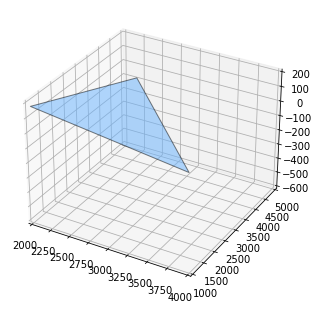

In [133]:
fig = plt.figure()
ax = Axes3D(fig); ax.set_xlim((2000, 4000)); ax.set_ylim((1000, 5000)); ax.set_zlim((-600, 200))

for i, nerve in enumerate(two_nerves):
    x = nerve[1:4, 0]; y = nerve[1:4, 1]; z = nerve[1:4, 2]; verts = [list(zip(x, y, z))]
    poly = Poly3DCollection(verts, alpha=0.5); color = label_to_color[i]; poly.set_color(colors.rgb2hex(color)); poly.set_edgecolor("k")
    ax.add_collection3d(poly)

# patch_0 = mpatches.Patch(color=label_to_color[0], label=label_to_str[0], alpha=0.5)
# patch_1 = mpatches.Patch(color=label_to_color[1], label=label_to_str[1], alpha=0.5)
# plt.legend(handles=[patch_0, patch_1], prop={"size": 20}); plt.show()

## Precise Mathematical Definition

$\color{#EF5645}{\text{Definition}}$: A _group_ is a set $G$ together with a _binary operation_ denoted $\cdot $, that _composes_ any two elements $a$ and $b$ to form an element of $G$, denoted $a \cdot b$, such that 3 axioms are satisfied:
- **Associativity:** For all $a, b, c$ in $G$, one has $(a \cdot b) \cdot c=a \cdot(b \cdot c)$.
- **Identity element:** There exists an element $e$ in $G$ such that, for every $a$ in $G$, one has $e \cdot a=a$ and $a \cdot e=a$. 
  - Such an element is unique and called the identity of $G$.
- **Inverse element:** For each $a$ in $G$, there exists an element $b$ in $G$ such that $a \cdot b=e$ and $b \cdot a=e$, where $e$ is the identity. 
  - It is unique, called the inverse of $a$ and denoted $a^{-1}$.
  

$\color{#EF5645}{\text{Definition}}$: A _Lie group_ is a manifold that is also a group.


## Explanations with 2D rotations

The group of 2D rotations is a Lie group called the Special Orthogonal group in 2D and is denoted $G=SO(2)$.

<center><img src="figs/01_rotation_2d.png" width=400px alt="default"/></center>

Elements of $SO(2)$ can be represented by an angle $\theta$ or by a 2 x 2 matrix.

In [1]:
from geomstats.geometry.special_orthogonal import SpecialOrthogonal

so = SpecialOrthogonal(n=2, point_type="vector")
theta = so.random_point(); theta

INFO: Using numpy backend


array([0.29306294])

In [3]:
from geomstats.geometry.special_orthogonal import SpecialOrthogonal

so = SpecialOrthogonal(n=2, point_type="matrix")
rotation_matrix = so.random_point(); rotation_matrix

array([[-0.63493946, -0.77256189],
       [ 0.77256189, -0.63493946]])

We verify computationally that $SO(2)$ is a group, by applying the definition.

- **binary operation**: Compose $R_1,R_2$ to get a new rotation $R_1 \cdot R_2$.

In [10]:
so = SpecialOrthogonal(n=2, point_type="matrix")

rotation1 = so.random_point(); print(rotation1)
rotation2 = so.random_point(); print(rotation2)

composition = so.compose(rotation1, rotation2); print(composition)
so.belongs(composition)

[[-0.06685468  0.99776272]
 [-0.99776272 -0.06685468]]
[[-0.92895952 -0.37018133]
 [ 0.37018133 -0.92895952]]
[[ 0.43145842 -0.90213282]
 [ 0.90213282  0.43145842]]


True

- **Axiom 1: Associativity**:

If we wish to compose three rotations sequentially, we can first compute the composition of the first two, and apply the last; or compose the last two and apply the result after applying the first.

In [15]:
rotation3 = so.random_point()

#R1 . (R2.R3)
print(so.compose(
    rotation1, 
    so.compose(rotation2, rotation3)))
#(R1 . R2).R3)
print(so.compose(
    so.compose(rotation1, rotation2), 
    rotation3))

[[-0.51145376  0.8593108 ]
 [-0.8593108  -0.51145376]]
[[-0.51145376  0.8593108 ]
 [-0.8593108  -0.51145376]]


- **Axiom 2: Identity $e$**.

We verify that composing with the identity element does not change a rotation.

In [16]:
print("The identity element of the group is:")
print(so.identity)

The identity element of the group is:
[[1. 0.]
 [0. 1.]]


In [22]:
print(rotation1)
print(so.compose(rotation1, so.identity))

[[-0.06685468  0.99776272]
 [-0.99776272 -0.06685468]]
[[-0.06685468  0.99776272]
 [-0.99776272 -0.06685468]]


- **Axiom 3: Inverse**.

We verify that composing a group element with its inverse gives the identity.

In [23]:
print("The inverse of a rotation is computed as:")
print(so.inverse(rotation1))

The inverse of a rotation is computed as:
[[-0.06685468 -0.99776272]
 [ 0.99776272 -0.06685468]]


In [24]:
print(so.compose(rotation1, so.inverse(rotation1)))

[[ 1.00000000e+00 -2.26452307e-16]
 [-2.26452307e-16  1.00000000e+00]]


## Lie Algebra

$\color{#EF5645}{\text{Definition}}$: The _Lie algebra_ of a Lie group is its tangent space at identity $T_eG$.

- The elements of $G$ are transformations (e.g. rotations).
- The tangent vectors are infinitesimal transformations (e.g. infinitesimal rotations).

<center><img src="figs/01_tangent_space_single.jpeg" width=400px alt="default"/></center>

### Example: Rotations

The Lie algebra of rotations is the space of skew-symmetric matrices.

In [25]:
so.lie_algebra

In [26]:
so.lie_algebra.random_point()

array([[ 0.        , -0.08749453],
       [ 0.08749453,  0.        ]])

# B) Lie groups: Outline

You will learn:

1. What is a (Lie) group of transformations?
2. **Why do we care about Lie groups?**
3. How can we implement Lie groups?

# 5. Why do we care about Groups?

$\textbf{Groups are important because transformations in nature } $$\textbf{"naturally form Lie groups"}$.

- Lie groups can express transformations.
- Lie groups can express symmetries.
- Even abstract symmetries, like symmetries in particle physics.

**Transformations**: Several rotation groups SO(3)s, one for each joint of the body.

<center><img src="figs/01_dance.png" width=900px alt="default"/></center>

**Symmetries**: Cyclic group $C_5$ of 5 rotations define symmetries of a molecule.

<center><img src="figs/01_protein.jpeg" width=800px alt="default"/></center>

**Abstract symmetries**: Group $SU(3)$ of quarks colors

<center><img src="figs/01_particles.jpeg" width=900px alt="default"/></center>

# B) Lie groups: Outline

You will learn:

1. What is a (Lie) group of transformations?
2. Why do we care about Lie groups?
3. **How can we implement Lie groups?**

# 6. How can we implement Lie groups?

- The `MatrixLieGroup` class is a special case (subclass) of `Manifold`.
- The `MatrixLieAlgebra` is a special case (subclass) of `VectorSpace`.

<center><img src="figs/01_manifold_hierarchy.jpeg" width=1000px alt="default"/></center>


`MatrixLieGroup` is implemented [here](https://github.com/geomstats/geomstats/blob/306ea04412a33c829d2ab9fc7ff713d99a397707/geomstats/geometry/lie_group.py#L17).

- Attributes of the `MatrixLieGroup` class are:
  - `dim`: the dimension of the group seen as a manifold
  - `n`: the size of the matrix defining an element of the group.
  - `identity`: identity $e$.
  - `lie_algebra`: tangent space at the identity: $T_eG$.
  
- Methods of the `MatrixLieGroup` class are:
  - `compose`: compose two elements with the binary operation.
  - `inverse`: invert an element.

# Take-Home Messages

- Real-world transformations and symmetries are often groups.
- All groups verify rules that can be implemented in `MatrixLieGroup`.
- Specific groups are implemented in subclasses.
- This course focuses on groups that describe:
  - shape transformations and symmetries.